In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# Simulating a dataset
np.random.seed(42)

data = {
    'Employee_ID': range(1, 101),
    'Work_Environment': np.random.choice(['Remote', 'Office'], size=100),  # Randomly assign 'Remote' or 'Office'
    'Mental_Health_Score': np.random.normal(50, 10, size=100),  # Normal distribution for mental health score
}

# Create the DataFrame
df = pd.DataFrame(data)

# Simulate some variation: Remote workers have slightly better mental health
df.loc[df['Work_Environment'] == 'Remote', 'Mental_Health_Score'] += 5

# Display the first few rows of the data
print(df.head())


   Employee_ID Work_Environment  Mental_Health_Score
0            1           Remote            62.384666
1            2           Office            51.713683
2            3           Remote            53.843517
3            4           Remote            51.988963
4            5           Remote            40.214780


In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())


Employee_ID            0
Work_Environment       0
Mental_Health_Score    0
dtype: int64
0


In [4]:
# Separate data into two groups
remote = df[df['Work_Environment'] == 'Remote']['Mental_Health_Score']
office = df[df['Work_Environment'] == 'Office']['Mental_Health_Score']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(remote, office)

# Display the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between remote and office workers' mental health scores.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


T-statistic: 3.4869503751264594
P-value: 0.0007329010079930574
Reject the null hypothesis: Significant difference between remote and office workers' mental health scores.


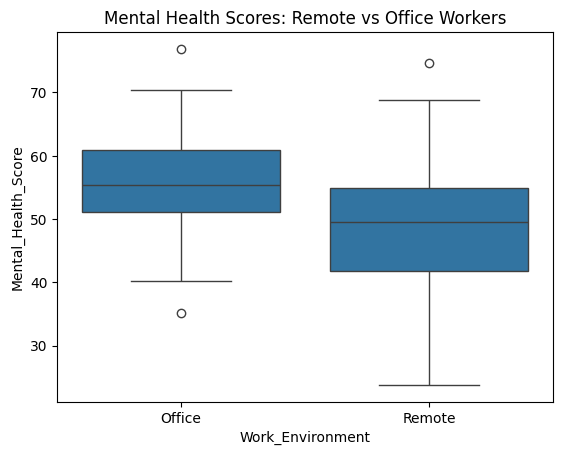

In [5]:
# Boxplot comparing mental health scores between remote and office workers
sns.boxplot(x='Work_Environment', y='Mental_Health_Score', data=df)
plt.title("Mental Health Scores: Remote vs Office Workers")
plt.xticks([0, 1], ['Office', 'Remote'])
plt.show()


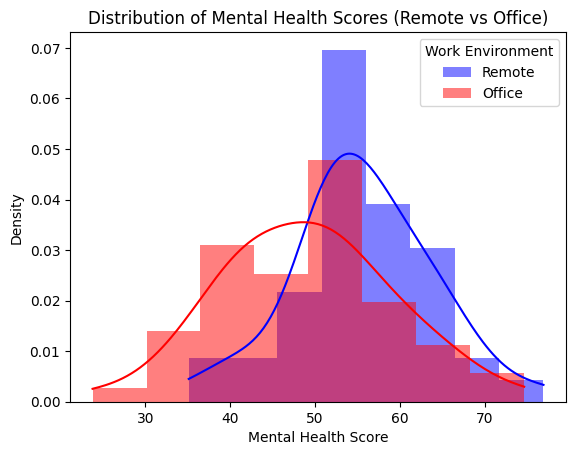

In [6]:
# Histogram for each group to see the distribution of mental health scores
sns.histplot(remote, kde=True, color='blue', label='Remote', stat='density', linewidth=0)
sns.histplot(office, kde=True, color='red', label='Office', stat='density', linewidth=0)

plt.legend(title='Work Environment')
plt.title('Distribution of Mental Health Scores (Remote vs Office)')
plt.xlabel('Mental Health Score')
plt.ylabel('Density')
plt.show()
